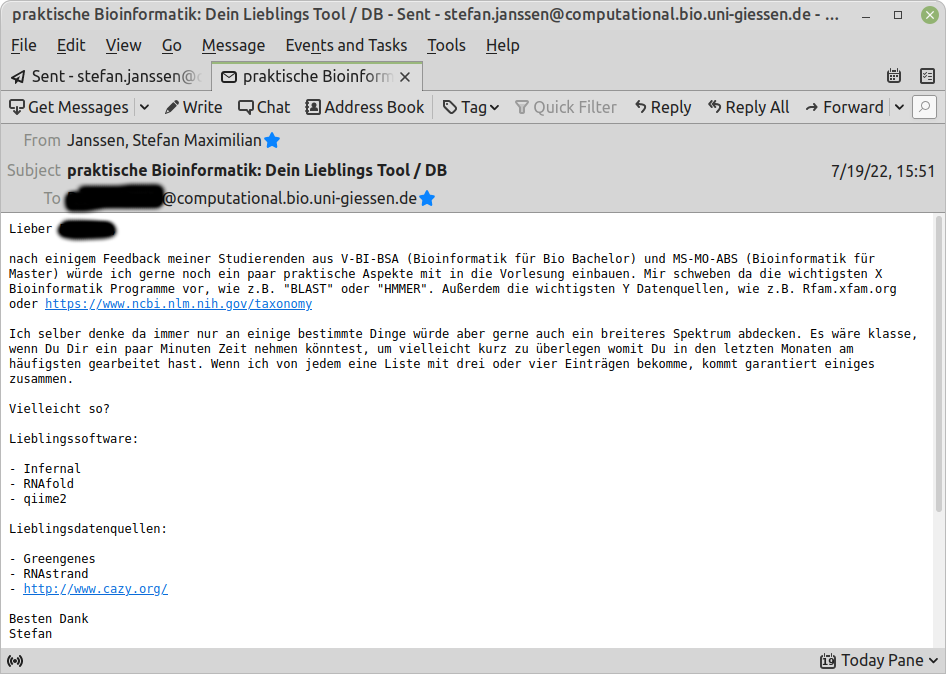

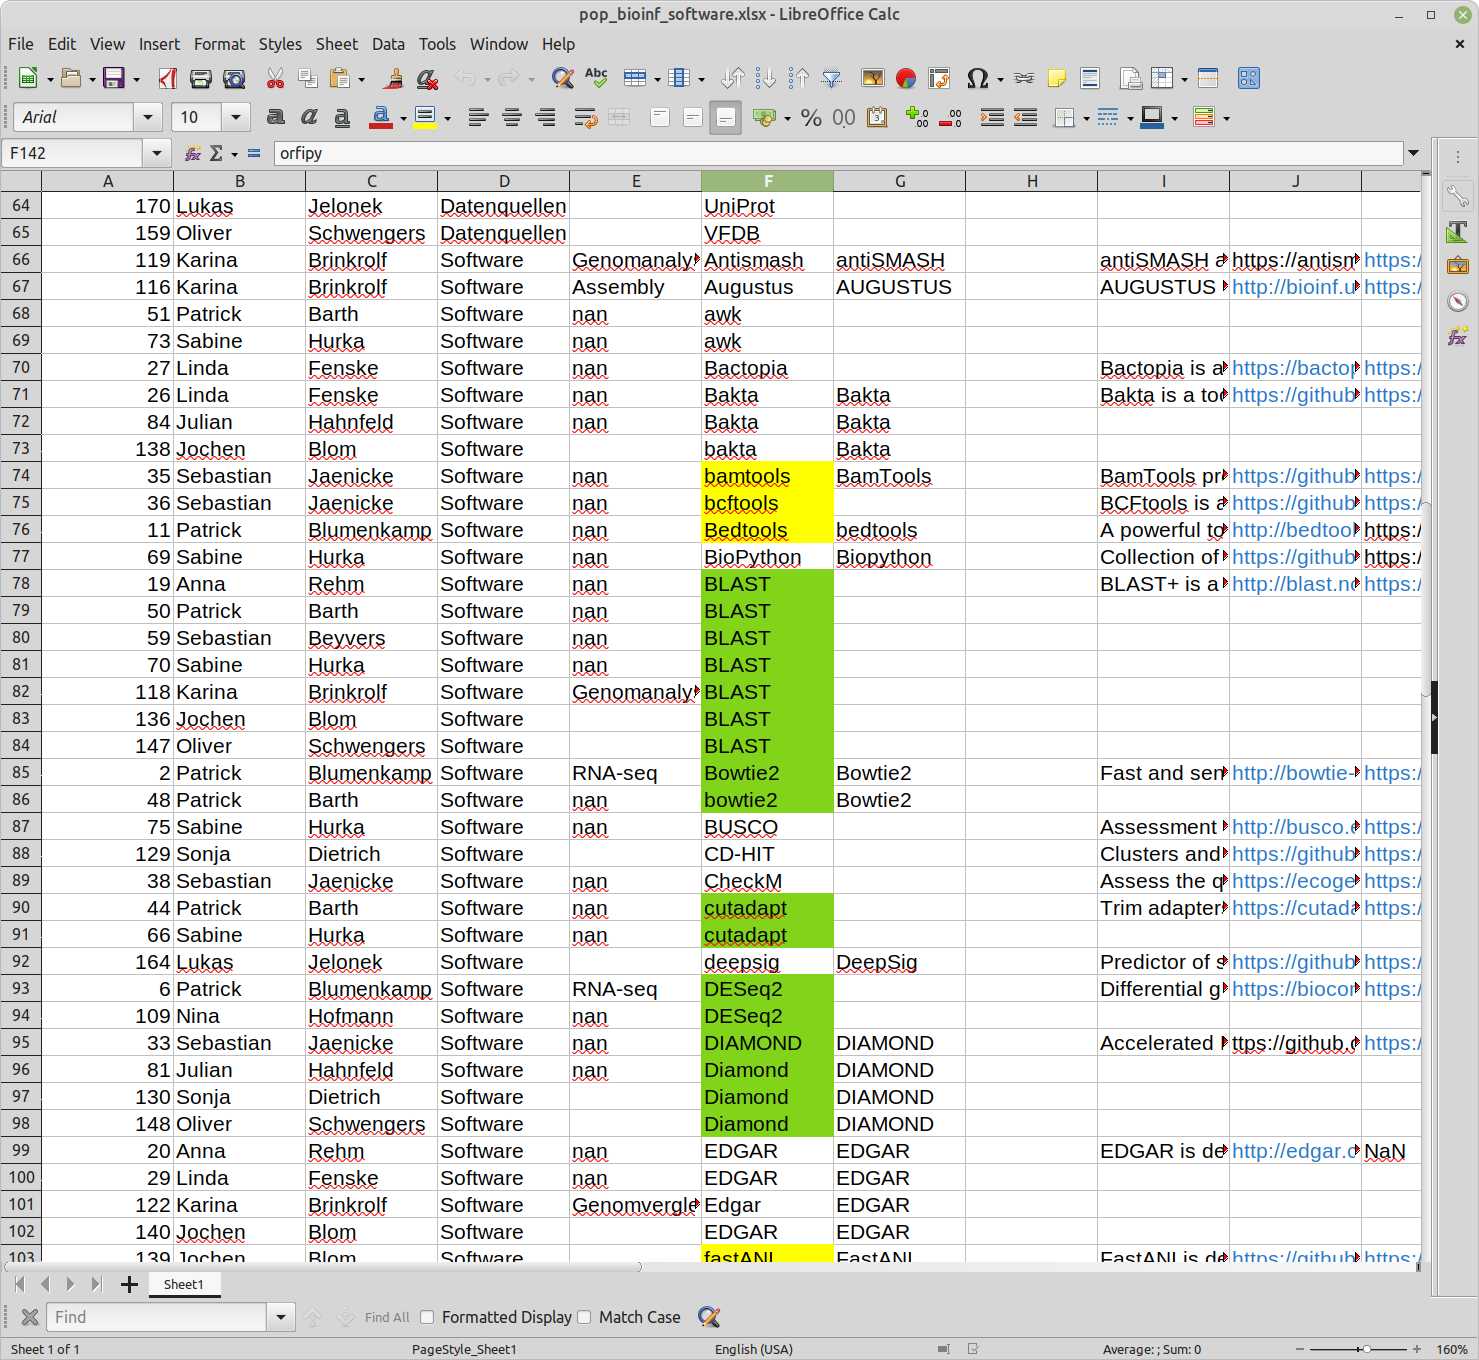

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd  # !conda install -c anaconda openpyxl
import seaborn as sns
from wordcloud import WordCloud  # !conda install -c conda-forge wordcloud
from matplotlib_venn import venn2  # !conda install -c conda-forge matplotlib-venn
import os
import random

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source  #!conda install -c conda-forge condastats
for p in ['http', 'https', 'ftp']:
    os.environ['%s_proxy' % p] = "http://proxy.computational.bio.uni-giessen.de:3128" 

In [2]:
data = pd.read_excel('data/pop_bioinf_software.xlsx', 
    index_col=0, 
    header=None, 
    names=['first_name', 
         'last_name', 
         'type', 
         'class', 
         'name', 
         'norm_name', 
         'explain', 
         'description', 
         'url_software', 
         'url_conda',
         'drop_reason']).dropna(axis=1, how="all")

data['conda_package'] = data['url_conda'].apply(lambda x: os.path.basename(x) if pd.notnull(x) else x)
data['user'] = data.apply(lambda row: row['first_name'] + ' ' + row['last_name'][:2] + '.', axis=1)
data.head()

,first_name,last_name,type,class,name,norm_name,explain,description,url_software,url_conda,drop_reason,conda_package,user
125,Karina,Brinkrolf,Datenquellen,Anitmikrobielle Peptide,ADP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karina Br.
158,Oliver,Schwengers,Datenquellen,NaN,AMRFinder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oliver Sc.
94,Julian,Hahnfeld,Datenquellen,NaN,AntiFam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Julian Ha.
127,Karina,Brinkrolf,Datenquellen,Anitmikrobielle Peptide,CAMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karina Br.
126,Karina,Brinkrolf,Datenquellen,Anitmikrobielle Peptide,DRAMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karina Br.


In [3]:
# remove "Datenquellen" for now
data = data[data['type'] != "Datenquellen"]

In [4]:
data_sum = data.groupby('norm_name').size().to_frame().rename(columns={0: 'poll_occ'})
data_sum = data_sum.merge(data.drop_duplicates(subset='norm_name'), left_index=True, right_on='norm_name', how='right')
data_sum

,poll_occ,first_name,last_name,type,class,name,norm_name,explain,description,url_software,url_conda,drop_reason,conda_package,user
45,1,Patrick,Barth,Software,NaN,fastx-toolkit,FASTXtoolkit,NaN,The FASTX-Toolkit is a collection of command l...,http://hannonlab.cshl.edu/fastx_toolkit/,https://anaconda.org/biobuilds/fastx-toolkit,NaN,fastx-toolkit,Patrick Ba.
119,1,Karina,Brinkrolf,Software,Genomanalysen,Antismash,antiSMASH,NaN,antiSMASH allows the rapid genome-wide identif...,https://antismash.secondarymetabolites.org,https://anaconda.org/bioconda/antismash,NaN,antismash,Karina Br.
116,1,Karina,Brinkrolf,Software,Assembly,Augustus,AUGUSTUS,NaN,AUGUSTUS is a program that predicts genes in e...,http://bioinf.uni-greifswald.de/augustus/,https://anaconda.org/bioconda/augustus,NaN,augustus,Karina Br.
27,1,Linda,Fenske,Software,NaN,Bactopia,Bactopia,NaN,Bactopia is a flexible pipeline for complete a...,https://bactopia.github.io/,https://anaconda.org/bioconda/bactopia,NaN,bactopia,Linda Fe.
26,3,Linda,Fenske,Software,NaN,Bakta,Bakta,NaN,Bakta is a tool for the rapid & standardized a...,https://github.com/oschwengers/bakta,https://anaconda.org/bioconda/bakta,NaN,bakta,Linda Fe.
35,1,Sebastian,Jaenicke,Software,NaN,bamtools,BamTools,NaN,BamTools provides both a programmer's API and ...,https://github.com/pezmaster31/bamtools,https://anaconda.org/bioconda/bamtools,NaN,bamtools,Sebastian Ja.
36,1,Sebastian,Jaenicke,Software,NaN,bcftools,bcftools,NaN,BCFtools is a set of utilities that manipulate...,https://github.com/samtools/bcftools,https://anaconda.org/bioconda/bcftools,NaN,bcftools,Sebastian Ja.
11,1,Patrick,Blumenkamp,Software,NaN,Bedtools,bedtools,NaN,A powerful toolset for genome arithmetic,http://bedtools.readthedocs.org/,https://anaconda.org/bioconda/bedtools,NaN,bedtools,Patrick Bl.
6,2,Patrick,Blumenkamp,Software,RNA-seq,DESeq2,DESeq2,NaN,Differential gene expression analysis based on...,https://bioconductor.org/packages/3.14/bioc/ht...,https://anaconda.org/bioconda/bioconductor-deseq2,NaN,bioconductor-deseq2,Patrick Bl.
19,7,Anna,Rehm,Software,NaN,BLAST,BLAST,NaN,BLAST+ is a new suite of BLAST tools that util...,http://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_T...,https://anaconda.org/bioconda/blast,NaN,blast,Anna Re.


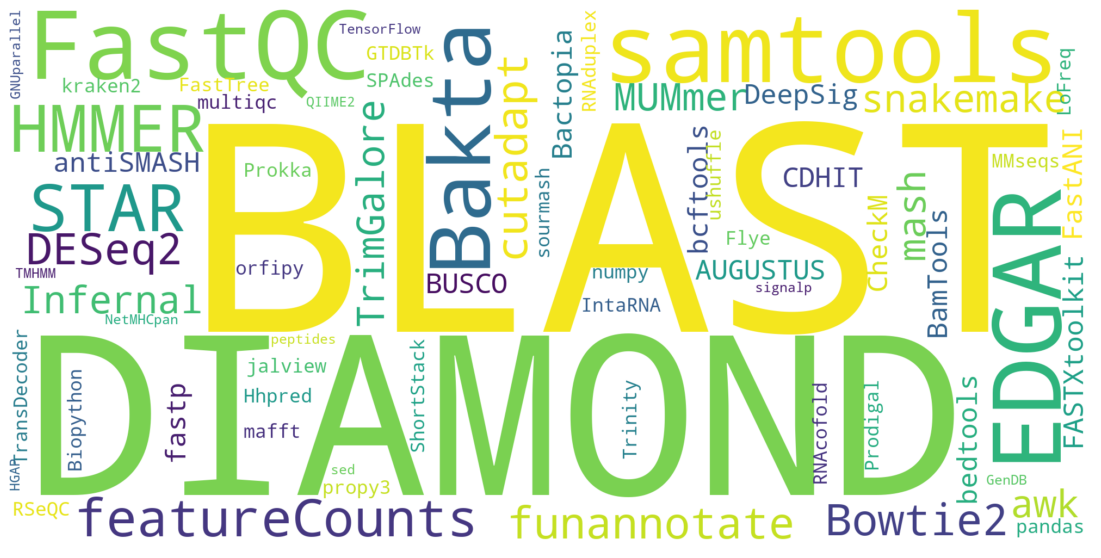

In [5]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="white", scale=5, stopwords=None, collocations=False).generate(' '.join(data['norm_name'].values))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.gcf().set_size_inches(20,10) 

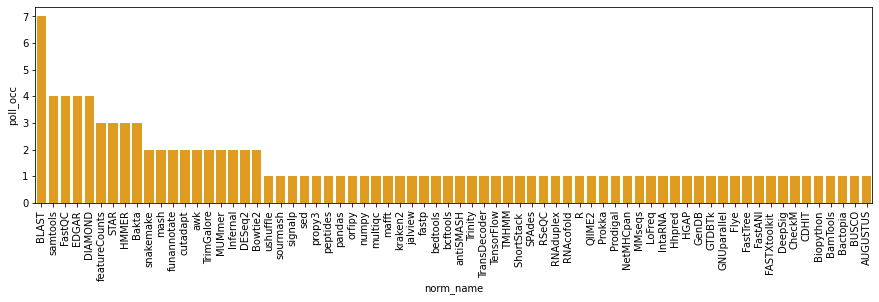

In [6]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=data_sum.sort_values(by=['poll_occ', 'norm_name'], ascending=False), x='norm_name', y='poll_occ', color="orange", ax=axes)
fig.autofmt_xdate(rotation=90, ha='center')

In [7]:
packages = ' '.join(data_sum['conda_package'].dropna().unique())
cmd = "/homes/sjanssen/miniconda3/envs/msmoabs/bin/condastats overall %s" % packages
print(cmd)
res = !$cmd

/homes/sjanssen/miniconda3/envs/msmoabs/bin/condastats overall fastx-toolkit antismash augustus bactopia bakta bamtools bcftools bedtools bioconductor-deseq2 blast bowtie2 busco cd-hit checkm-genome cutadapt deepsig diamond fastani fastp fastqc fasttree flye funannotate gtdbtk hhsuite hmmer infernal intarna jalview kraken2 lofreq mafft mash mmseqs2 multiqc mummer4 orfipy prodigal prokka propy3 rseqc samtools shortstack snakemake sourmash spades star subread transdecoder trim-galore trinity ushuffle viennarna biopython numpy pandas r-base r-peptides tensorflow signalp5 tmhmm qiime2


In [8]:
for line in res[1:-1]:
    pkg, downloads = line.strip().split()
    data_sum.loc[data_sum[data_sum['conda_package'] == pkg].index, 'downloads'] = int(downloads)

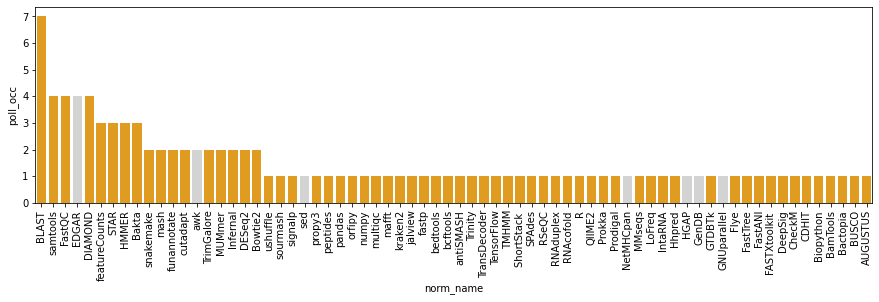

In [9]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
cols = ["orange" if pd.notnull(row['conda_package']) else "lightgray" for idx, row in data_sum.sort_values(by=['poll_occ', 'norm_name'], ascending=False).iterrows()]
sns.barplot(data=data_sum.sort_values(by=['poll_occ', 'norm_name'], ascending=False), x='norm_name', y='poll_occ', palette=cols, ax=axes)
fig.autofmt_xdate(rotation=90, ha='center')

In [10]:
# drop software without conda packages
data_sum_conda = data_sum[pd.notnull(data_sum['conda_package'])]

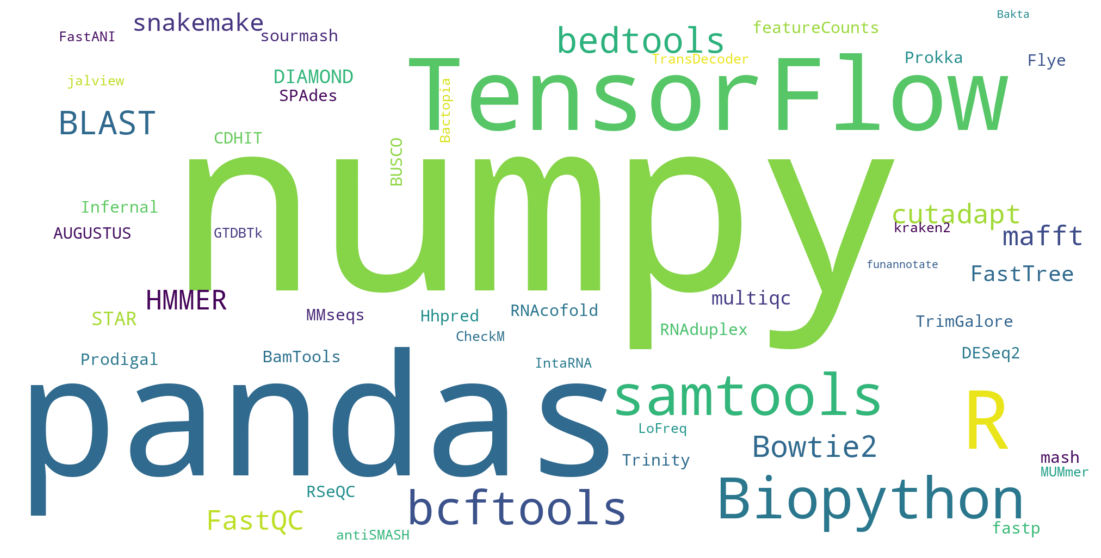

In [11]:
# Generate a word cloud image
wc2 = WordCloud(
    background_color="white", scale=5, stopwords=None, collocations=False).generate_from_frequencies(data_sum_conda.set_index('norm_name')['downloads'].dropna().to_dict())
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.gcf().set_size_inches(20,10) 

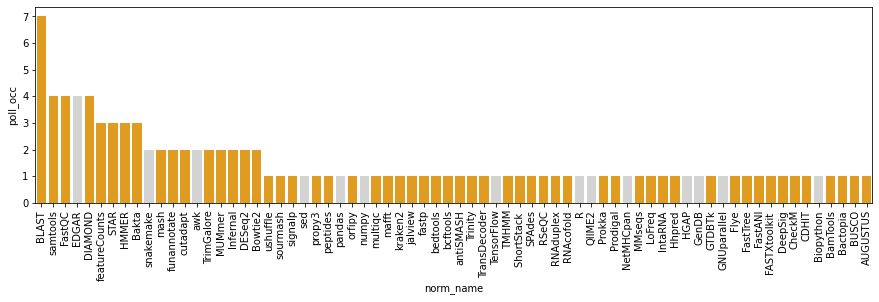

In [12]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
cols = ["orange" if (pd.notnull(row['conda_package']) and (pd.isnull(row['drop_reason']))) else "lightgray" for idx, row in data_sum.sort_values(by=['poll_occ', 'norm_name'], ascending=False).iterrows()]
sns.barplot(data=data_sum.sort_values(by=['poll_occ', 'norm_name'], ascending=False), x='norm_name', y='poll_occ', palette=cols, ax=axes)
fig.autofmt_xdate(rotation=90, ha='center')

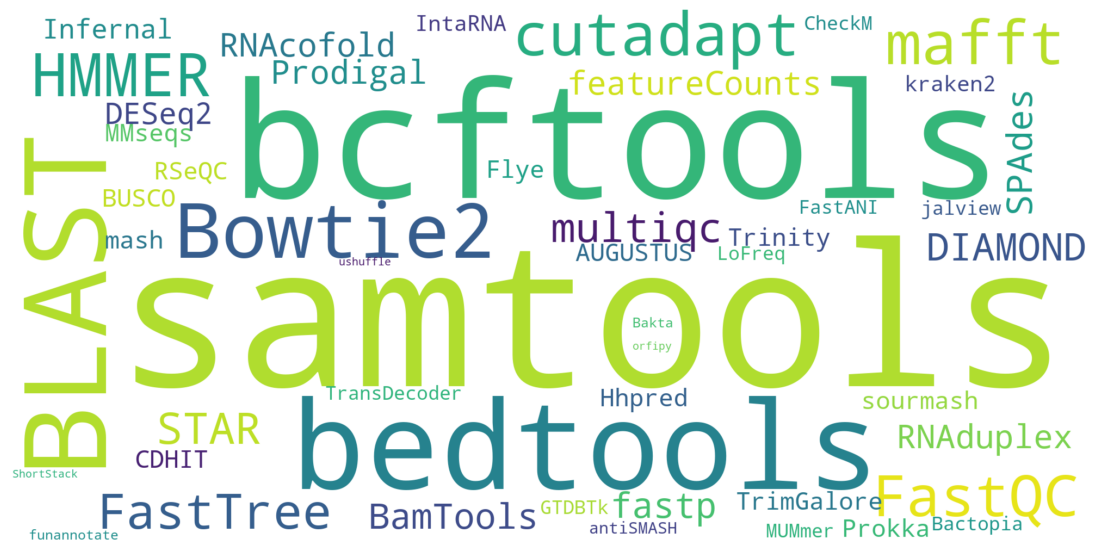

In [13]:
# Generate a word cloud image
wc3 = WordCloud(
    background_color="white", scale=5, stopwords=None, collocations=False).generate_from_frequencies(data_sum_conda[pd.isnull(data_sum_conda['drop_reason'])].set_index('norm_name')['downloads'].dropna().to_dict())
plt.imshow(wc3, interpolation="bilinear")
plt.axis("off")
plt.gcf().set_size_inches(20,10) 

(0.0, 5000000.0)

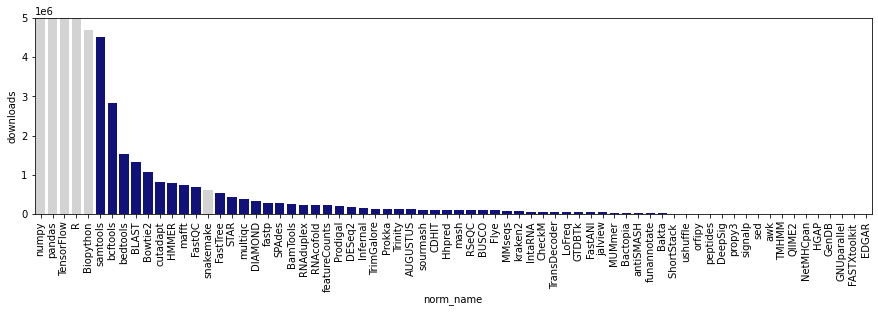

In [14]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
cols = ["darkblue" if (pd.notnull(row['conda_package']) and (pd.isnull(row['drop_reason']))) else "lightgray" for idx, row in data_sum.sort_values(by=['downloads', 'norm_name'], ascending=False).iterrows()]
sns.barplot(data=data_sum.sort_values(by=['downloads', 'norm_name'], ascending=False), x='norm_name', y='downloads', palette=cols, ax=axes)
fig.autofmt_xdate(rotation=90, ha='center')
fig.axes[0].set_ylim((0,10000000/2))

In [15]:
winner = data_sum[pd.notnull(data_sum['conda_package']) & 
             pd.isnull(data_sum['drop_reason'])].sort_values(by=['downloads', 'norm_name'], ascending=False)['conda_package'].iloc[:10]

'conda install -c conda-forge -c bioconda '+' '.join(winner.values)

'conda install -c conda-forge -c bioconda samtools bcftools bedtools blast bowtie2 cutadapt hmmer mafft fastqc fasttree'

(0.0, 1000000.0)

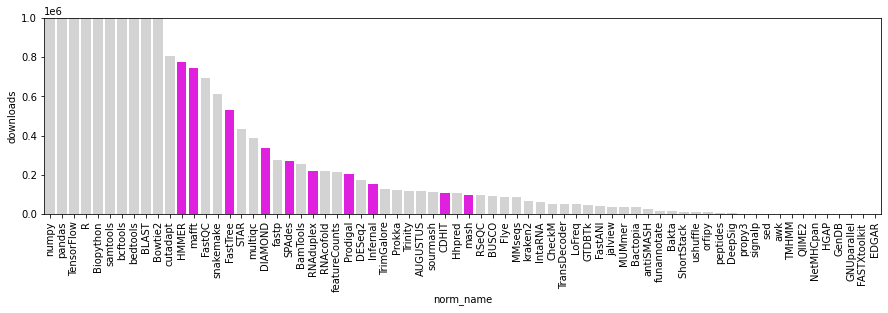

In [16]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
cols = ["magenta" if (pd.notnull(row['explain'])) else "lightgray" for idx, row in data_sum.sort_values(by=['downloads', 'norm_name'], ascending=False).iterrows()]
sns.barplot(data=data_sum.sort_values(by=['downloads', 'norm_name'], ascending=False), x='norm_name', y='downloads', palette=cols, ax=axes)
fig.autofmt_xdate(rotation=90, ha='center')
fig.axes[0].set_ylim((0,1000000))

In [17]:
genome = "Die Studierenden kennen wesentliche Datentypen und Dateiformate im Bereich der Bioinformatik verstehen grundlegende Algorithmen und Anwendungen der Bioinformatik und koennen diese einsetzen verstehen spezifische Probleme und Schwierigkeiten dieser Algorithmen und Methoden erlangen relevante Kenntnisse in der Verwendung der Kommandozeile unter UNIX erlangen relevante Grundkenntnisse in der Nutzung der statistischen Programmiersprache R kennen verschiedene Hochdurchsatzmethoden und haben Kenntnisse in der Handhabung und Analyse der damit assoziierten Daten".replace(" ", "").lower()
print("genome length", len(genome))
read_len = 30

reads = []
cov = pd.Series(index=range(len(genome)), dtype=int, data=0)
with open("data/module_reads.fa", "w") as f:
    for i in range(10000):
        pos = random.randint(0, len(genome)-read_len)
        read = genome[pos:pos+read_len]
        #posread = '%s%s%s' % ("-" * pos, read, "-" * (len(genome)-pos-read_len))
        cov.iloc[pos:pos+read_len] = cov.iloc[pos:pos+read_len] + 1
        #print(read)
        reads.append(read)
        #f.write("@read_%06i\n%s\n+\n%s\n" % (i, read, 'v' * len(read)))
        f.write(">read_%06i\n%s\n" % (i, read))
        if cov.min() >= 10:
            break
    print("# reads", len(reads))

genome length 495
# reads 3229


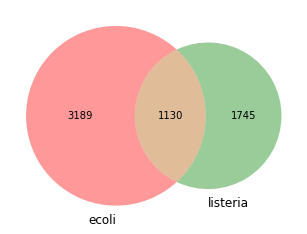

In [18]:
venn2(subsets = (4319-1130, 2875-1130, 1130), set_labels = ('ecoli', 'listeria'))